In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

daten = pd.read_csv('../../PyCharm/daten4.csv')
features = daten.drop(columns=['genre'])
labels = daten['genre']

#Daten normalisieren:
scaler = MinMaxScaler() 
scaler.fit(features) #scaler an die Daten anpassen (damit z.B. max und min bestimmt wird)
features_n = scaler.transform(features) # Daten mit den vorher festgelegten/bestimmten Werte (min/max) normalisieren.

#Datensatz trennen
X_train, X_test, Y_train, Y_test = train_test_split(features_n,labels,test_size=0.2,shuffle = True, random_state=27)

In [15]:
daten

,genre,bpm,rolloff,centroid,rms,zcr,spec_bw,spec_flatness,mfcc1,mfcc2,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,1,99.384014,5255.659886,2495.546632,0.289357,76192,2471.617014,0.031880,20.349596,80.351370,...,39.906560,7.662927,20.692038,1.414384,9.024804,1.513066,5.608293,-2.335551,7.899021,0.767538
1,1,123.046875,5431.883821,2900.316068,0.185551,122126,2344.055978,0.046646,-5.796152,63.040250,...,56.643787,-0.607900,6.109908,-3.358388,8.901834,-4.639855,8.983838,0.959312,3.367416,-9.980425
2,1,135.999178,5294.859649,3015.964413,0.140342,125400,2331.498584,0.033719,-64.627205,43.719830,...,88.343636,8.338187,8.727283,3.209645,7.177145,4.233348,2.649901,-5.393382,6.517754,-7.831575
3,1,143.554688,5642.565880,2793.400372,0.210537,95050,2574.919868,0.046776,12.242660,71.250720,...,31.140879,4.511400,12.721781,5.146774,10.117762,1.241600,6.782038,0.246357,10.085506,-1.817713
4,1,135.999178,4772.954472,2464.891105,0.315384,96019,2199.920120,0.015854,14.355835,80.207400,...,55.027477,-9.343242,5.275100,-9.075646,11.748434,-3.539245,-0.022116,-8.006315,3.861654,-4.533364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,5,143.554688,4492.281169,2204.498821,0.203151,63681,2273.601267,0.019966,-84.085570,79.192400,...,48.948147,13.405498,19.272095,8.406950,3.353726,9.811500,12.632483,-0.206280,11.322653,3.677913
2496,5,129.199219,3587.936638,1718.721305,0.288395,46323,2128.123565,0.009145,-91.535070,118.648630,...,20.500395,7.035615,7.703161,-2.694060,6.273777,-0.996993,2.507251,-0.855174,-0.857111,-0.199304
2497,5,95.703125,5949.072360,2955.224211,0.117721,89244,2657.188282,0.026581,-174.199460,68.993164,...,9.275723,0.602105,32.189095,4.058909,16.418220,21.652530,-2.203484,-0.869493,2.012689,-0.515251
2498,5,172.265625,2167.686892,1088.294023,0.125496,30657,1349.189739,0.002711,-229.441560,159.808580,...,31.071785,20.865135,13.920862,26.892494,4.284634,8.620433,-1.518481,0.366252,2.969437,2.146298


0.71 accuracy with a standard deviation of 0.06


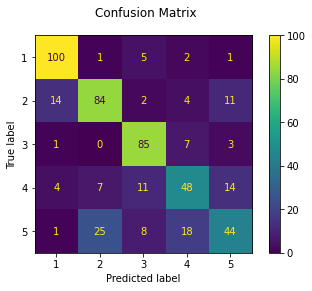

In [29]:
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt


#Model trainieren
clf = svm.LinearSVC()
clf.fit(X_train, Y_train)

#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, X_test, Y_test, cv=12)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ergebnis.mean(), ergebnis.std()))

#Confusion Matrix darstellen
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

0.67 accuracy with a standard deviation of 0.05


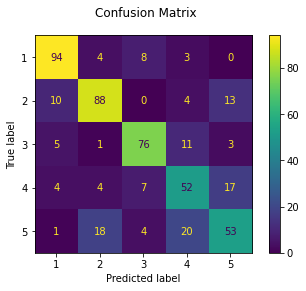

In [23]:
from sklearn.ensemble import RandomForestClassifier

#Model trainieren
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)

#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, X_test, Y_test, cv=12)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ergebnis.mean(), ergebnis.std()))

#Confusion Matrix darstellen
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

0.72 accuracy with a standard deviation of 0.05


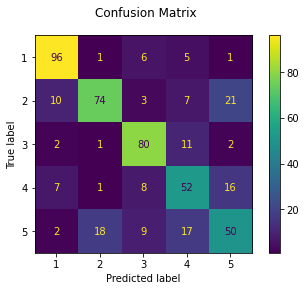

In [18]:
from sklearn.linear_model import LogisticRegression

#Model trainieren
clf = LogisticRegression(random_state=0, max_iter=5000) #max_iter musste ich festlegen, damit eine fehlermeludng nicht kommt --> erklärung dazu auf sklearn seite
clf.fit(X_train, Y_train)

#Cross-Validation
from sklearn.model_selection import cross_val_score
ergebnis = cross_val_score(clf, X_test, Y_test, cv=12)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ergebnis.mean(), ergebnis.std()))

#Confusion Matrix darstellen
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()